In [126]:
import matplotlib.pyplot as plt
import numpy as np
import Phys
import random
# physical constants in cgs units
constants = Phys.ReadPhys()

from SpecWizard_Input import ReadData
from SpecWizard_BuildInput import Build_Input
from SpecWizard_ProjectData import SightLineProjection
import importlib
import SpecWizard_ComputeOpticaldepth

SpecWizard_ComputeOpticaldepth = importlib.reload(SpecWizard_ComputeOpticaldepth)

from SpecWizard_ComputeOpticaldepth import ComputeOpticaldepth



In [85]:
x = 0.757
y = 0.805
z = 0.879

In [76]:
BuildInput = Build_Input()
BuildInput.FileType(sim_type='Eagle',snap_type='snapshot')

In [77]:
snapdir = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data/snapshot_012_z003p017'
snapfile = 'snap_012_z003p017.0.hdf5'

In [78]:
BuildInput.SnapshotParams(path=snapdir,file=snapfile)

In [79]:
table_type     = 'specwizard_cloudy'
iondir         = '/cosma7/data/Eagle/SpecWizardCloudytables/HM12/'
fname          = '' 
SFR_properties = {'modify_particle':True,'ignore_particle': False,
                  'Temperature [K]':1e4}
ElementIons    = [('Hydrogen','H I'),('Helium','HeII'),('Carbon','C IV'),('Silicon','SiIV')]

In [80]:
BuildInput.SetIonTableParams(table_type=table_type,iondir=iondir,ions=ElementIons,fname=fname,SFR_properties=SFR_properties)

In [ ]:
Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=(x,y,0),ProjectionLength=1,SightLength=1,ProjectionExtend = {'extend':False,'extendfactor':20})

Warning! nsight NOT found. Setting default value : 0


In [70]:
snapshot  = ReadData(wizard = Wizard)
particles = snapshot.read_particles()

In [71]:
sightlineprojection  = SightLineProjection(Wizard)
projected_LOS        = sightlineprojection.ProjectData(particles)

In [72]:
vel_kms = np.arange(projected_LOS["npix"] ) * projected_LOS['pixel_kms']['Value']


In [75]:
cspec          = ComputeOpticaldepth(Wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)

Sum column:  3.525290742694441e+18
Column from tau 3.525290742694444e+18
Sum column:  3.295103745323107e+19
Column from tau 3.2951037453231116e+19


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  410265693495654.3
Column from tau 410265693495653.75
Sum column:  304493870223502.1
Column from tau 304493870223502.06


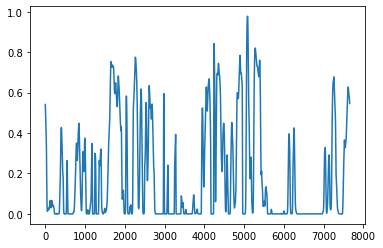

In [76]:
plt.plot(np.exp(-opticaldepth[('Helium', 'HeII')]['Optical depths']['Value']))

In [77]:
[0.757,0.805

In [78]:
x = 0.757
y = 0.805
z = 0.879

In [79]:
dz = 0.01
dz = 2*dz
dx = 2e-3


In [80]:
sighlines_pos =  [(x-2*dx,y,z-dz),(x-dx,y,z-dz),(x,y,z-dz),(x+dx,y,z-dz),(x+2*dx,y,z-dz)]

In [81]:
def do_sight(isight, projections):
    Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=sighlines_pos[isight],ProjectionLength=2*dz)
    # read the particle data
    snapshot  = ReadData(wizard = Wizard)
    data                = snapshot.read_particles()
    # project the particle data
    sightlineprojection  = SightLineProjection(Wizard)

    projected_LOS = sightlineprojection.ProjectData(data)

    Wizard['sightline']['ProjectionExtend']["extend"]          = True
    Wizard['sightline']['ProjectionExtend']["extendfactor"]    = 20
    cspec          = ComputeOpticaldepth(Wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)
    result                = {"nsight": isight,  
                             'OpticaldepthWeighted':opticaldepth,
                              'Projected':projected_LOS}
    projections[isight] = result

In [82]:
ncpu   = 5      # number of cores to be used
nsight = 5     # number of sight lines to compute
#    
pool   = multiprocessing.Pool(ncpu)
manager      = multiprocessing.Manager()
projections_extended  = manager.dict()

for i in range(nsight):
    pool.apply_async(do_sight, args=(i, projections_extended))
pool.close()
pool.join()

Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1

Warning! SightLength NOT found. Setting default value : 1
Warning! SightLength NOT found. Setting default value : 1Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}


Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! nsight NOT found. Setting default value : 0Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}


Warning! nsight NOT found. Setting default value : 0


Warning! You are calculating a los shorter than the box-size 

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column: Sum column:   7.385357244434154e+16193398002198553.75
Sum column:  
Column from tauColumn from tau 248689286451297.03
193398002198553.72 Column from tau
7.385357244434134e+16 
248689286451297.22
Sum column:  4029727362717.2227
Column from tau 4029727362717.221
Sum column:  Sum column:  2061902657111.8418Sum column: 
5308467047276.786Column from tau 
 1.9842584704750738e+18Column from tau2061902657111.841

 Column from tau5308467047276.788 
1.9842584704750723e+18
Sum column: Sum column:   7827903980.54142344723968712.209

Column from tauColumn from tau  44723968712.2090157827903980.541411

Sum column:  123749391.21102692
Column from tau 123749391.21102697


In [48]:
Ions = Wizard['ionparams']['Ions']
pixel_kms = snapshot.ToCGS(projected_LOS["pixel_kms"]) / 1e5
npix      = projected_LOS["npix"]
vel_kms   = np.arange(npix) * pixel_kms

/cosma/local/Python/3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


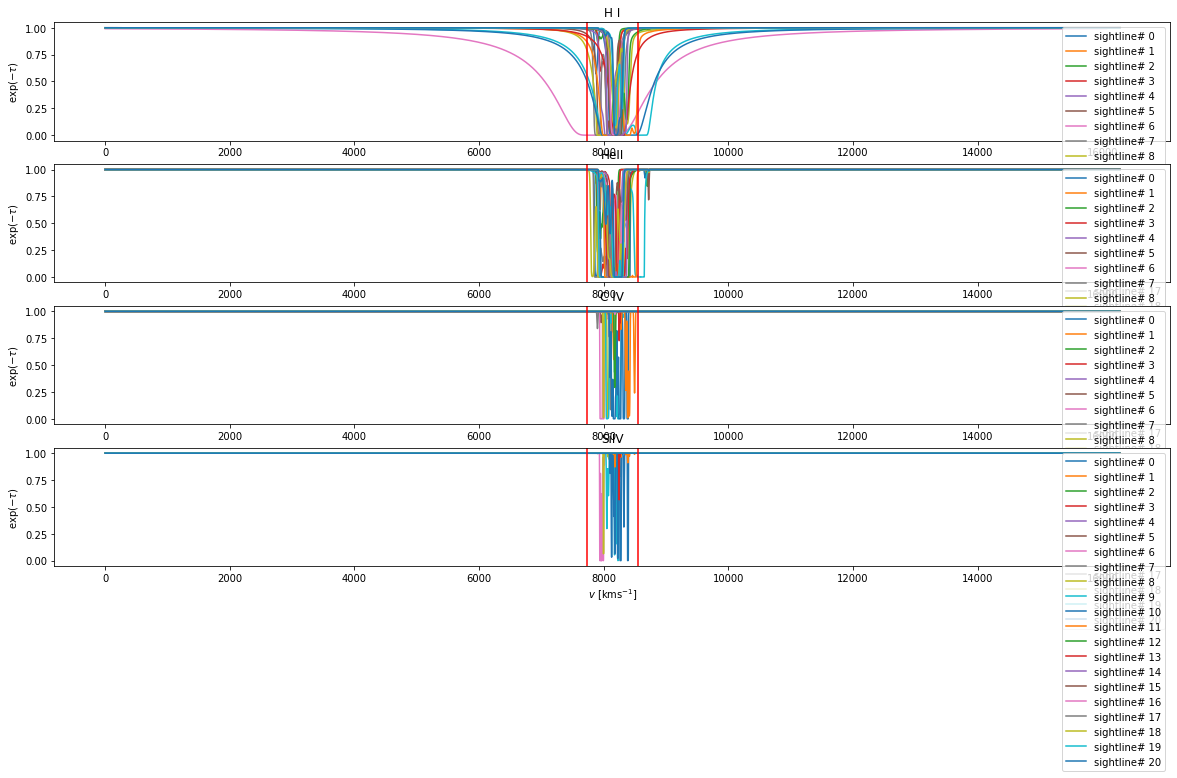

In [62]:
Numof_Ions = len(Ions)
fig, ax  = plt.subplots(Numof_Ions, 1, figsize = (20, 10))

for (i, ion) in zip (np.arange(Numof_Ions), Ions):
    #ax[i].set_xlim(0, box_kms)
    try:
        for j in range(21):
            ax[i].plot(np.exp(-snapshot.ToCGS(projections_extended[j]['OpticaldepthWeighted'][ion]['Optical depths'])),label = 'sightline# '+str(j))
    except:
        continue
    element, ion_name = ion
    title = r"{}".format(ion_name)
    ax[i].set_title(title)
    ax[i].set_ylabel(r"$\exp(-\tau)$")
    ax[i].set_xlabel(r"$v\ [{\rm km s}^{-1}]$")
    ax[i].legend()
    ax[i].axvline(x=7733,c='r')
    ax[i].axvline(x=8547,c='r')
    #ax[i].set_xlim(6200,6800)
fig.tight_layout()
fig.show()
plt.savefig("extended_tom.pdf",dpi=300)

## SQL 

In [1]:
import eagleSqlTools as sql
import numpy as np
import multiprocessing

In [2]:
me     = "tt"
mine   = "vr983MZL"
conSQL = sql.connect(me, password=mine)

In [16]:
me     = "tt"
mine   = "vr983MZL"
conSQL = sql.connect(me, password=mine)
simname   = {'sql':'RefL0100N1504','particles':'L0100N1504/PE/REFERENCE/'}
variables = [{'type':1, 'name':'Coordinates'}]
snapnum   = 12

In [17]:
# sql query parameters
class Eagle:
    def __init__(self, simname=simname, sqlpars=sqlpars,snapnum=snapnum):
        ''' Methods to interface SQL database and particles from snapshots '''
        self.snapnum    = snapnum
        self.simname    = simname   # particlular simulation

        # read header of snapshot data
        self.eaglebase  = '/cosma7/data/Eagle/ScienceRuns/Planck1/'
        self.subbase    = 'snapshot_'
        self.partbase   = 'snap_'
        # create file name
        file            = self.eaglebase + self.simname['particles'] + '/data/' + self.subbase 
        file           += self.snapbase(snapnum) + '/' + self.partbase + self.snapbase(snapnum) + '.0.hdf5'
        self.fname      = file
    def QueryDB(self, sqlpars):
        ''' Query data base '''
        mhistory = '''SELECT 
                          FOF.Group_M_Crit200 as m200,
                          FOF.GroupCentreOfPotential_x as x, 
                          FOF.GroupCentreOfPotential_y as y, 
                          FOF.GroupCentreOfPotential_z as z
                  FROM 
                          {simname}_FOF as FOF 
                  WHERE 
                          FOF.Group_M_Crit200 > {m_min:1.2e} 
                          and FOF.RandomNumber < {fraction:1.3f}
                          and FOF.SnapNum = {snapnum:3d}
                  ORDER BY 
                          FOF.Group_M_Crit200 desc'''.format(
                                                     simname=self.simname['sql']
                                                    ,m_min=sqlpars['m_min']
                                                    , fraction = sqlpars['fraction']
                                                    , snapnum=self.snapnum)
                                                
        return sql.execute_query(conSQL, mhistory)
        
        
        
    def snapbase(self, snapnum=28):
        ''' return file base for particle file '''
        bases      = ['000_z020p000', '001_z015p132', '002_z009p993'
                  , '003_z008p988', '004_z008p075', '005_z007p050'
                  , '006_z005p971', '007_z005p487', '008_z005p037'
                  , '009_z004p485', '010_z003p984', '011_z003p528'
                  , '012_z003p017', '013_z002p478', '014_z002p237'
                  , '015_z002p012', '016_z001p737', '017_z001p487'
                  , '018_z001p259', '019_z001p004', '020_z000p865'
                  , '021_z000p736', '022_z000p615', '023_z000p503'
                  , '024_z000p366', '025_z000p271', '026_z000p183'
                  , '027_z000p101', '028_z000p000']
        try:
            return bases[snapnum]
        except:
            print('This snapshot does not exists, sorry')
        

In [30]:
np.array([7.7113075,83.59958,66.6103])/100

array([0.07711308, 0.8359958 , 0.666103  ])

In [19]:
m_min = 10**(12.5)
sqlpars   = { 'm_min':m_min,  'fraction':1}   # select halos with given mass


In [21]:
eagle = Eagle()
halos = eagle.QueryDB(sqlpars)

In [29]:
halos

array([(1.5846906e+13, 24.190887 , 77.35234  , 61.463287 ),
       (7.8962187e+12, 53.17605  ,  4.2680054, 24.601295 ),
       (7.8488184e+12,  8.684796 , 84.40105  , 62.63248  ),
       (7.5057872e+12, 63.802166 , 54.23991  , 84.235374 ),
       (7.1948981e+12,  9.647266 , 56.522205 , 58.38636  ),
       (7.0891392e+12,  9.346236 , 73.890274 , 44.21898  ),
       (6.9591399e+12, 82.10295  , 13.679236 , 58.2214   ),
       (5.7022847e+12, 85.837585 , 82.31762  , 29.60505  ),
       (5.5950222e+12,  8.687913 , 84.00396  , 58.726913 ),
       (5.3640251e+12, 31.153252 , 65.04012  ,  9.567572 ),
       (5.2462800e+12,  7.6622205, 33.723774 , 59.597824 ),
       (5.2227348e+12, 34.463802 , 47.41502  , 98.89917  ),
       (5.1788471e+12, 17.416004 , 83.43411  , 49.89938  ),
       (5.1587559e+12, 48.537243 ,  5.9474807, 15.778088 ),
       (4.8002111e+12, 34.40367  , 67.20637  ,  8.509598 ),
       (4.7384782e+12, 71.80955  , 25.35879  , 62.797417 ),
       (4.6967098e+12,  7.978712 , 86.26

In [24]:
len_of_hal = len(halos)

In [25]:
random_indx150 = random.sample(range(0,len_of_hal),150)

NameError: name 'random' is not defined

In [26]:
len(random_indx150)

NameError: name 'random_indx150' is not defined

In [27]:
x = halos[0][1]/100
y = halos[0][2]/100
z = halos[0][3]/100


In [28]:
print(x,y,z)

0.24190887451171875 0.7735234069824218 0.6146328735351563


In [150]:
sighlines_pos =  [ (x-j*dx,y,z-dz*0.5) for j in np.arange(-10,11)]

In [151]:
len(sighlines_pos)

21

In [152]:
BuildInput = Build_Input()
BuildInput.FileType(sim_type='Eagle',snap_type='snapshot')

In [164]:
snapdir = '/cosma7/data/Eagle/ScienceRuns/Planck1/L0100N1504/PE/REFERENCE/data/snapshot_015_z002p012'
snapfile = 'snap_015_z002p012.0.hdf5'

In [165]:
BuildInput.SnapshotParams(path=snapdir,file=snapfile)

In [166]:
table_type     = 'specwizard_cloudy'
iondir         = '/cosma7/data/Eagle/SpecWizardCloudytables/HM12/'
fname          = '' 
SFR_properties = {'modify_particle':True,'ignore_particle': False,
                  'Temperature [K]':1e4}
ElementIons    = [('Hydrogen','H I'),('Helium','HeII'),('Carbon','C IV'),('Silicon','SiIV')]

In [167]:
BuildInput.SetIonTableParams(table_type=table_type,iondir=iondir,ions=ElementIons,fname=fname,SFR_properties=SFR_properties)

In [170]:
    Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=sighlines_pos[0],ProjectionLength=dz)


Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions


In [171]:
    snapshot  = ReadData(wizard = Wizard)
    data                = snapshot.read_particles()

In [172]:
expfact = 1/ (snapshot.header['Cosmo']['Redshift'] + 1)

In [190]:
dx = (1/ 0.33196009899287526)/400 / 100

In [191]:
dx

7.531025588872524e-05

In [181]:
dz = 0.12
sighlines_pos =  [ (x-j*dx,y,z-dz*0.5) for j in np.arange(0,401)]

In [186]:
def do_sight(isight, projections):
    Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=sighlines_pos[isight],ProjectionLength=dz)
    # read the particle data
    snapshot  = ReadData(wizard = Wizard)
    data                = snapshot.read_particles()
    # project the particle data
    sightlineprojection  = SightLineProjection(Wizard)

    projected_LOS = sightlineprojection.ProjectData(data)

    Wizard['sightline']['ProjectionExtend']["extend"]          = True
    Wizard['sightline']['ProjectionExtend']["extendfactor"]    = 20
    cspec          = ComputeOpticaldepth(Wizard)
    opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)
    result                = {"nsight": isight,  
                             'OpticaldepthWeighted':opticaldepth,
                              'Projected':projected_LOS}
    projections[isight] = result

In [47]:
Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=sighlines_pos[0],ProjectionLength=dz)
snapshot  = ReadData(wizard = Wizard)
data                = snapshot.read_particles()
sightlineprojection  = SightLineProjection(Wizard)

projected_LOS = sightlineprojection.ProjectData(data)

Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions


In [24]:
ncpu   = 5      # number of cores to be used
nsight = 21     # number of sight lines to compute
#    
pool   = multiprocessing.Pool(ncpu)
manager      = multiprocessing.Manager()
projections_extended  = manager.dict()

for i in range(nsight):
    pool.apply_async(do_sight, args=(i, projections_extended))
pool.close()
pool.join()

Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1

Warning! SightLength NOT found. Setting default value : 1Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}



Warning! nsight NOT found. Setting default value : 0
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0


Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Warning! nsig

In [203]:
    Wizard = BuildInput.Sightline(ProjectionAxes=('simx','simy','simz'),ProjectionStart=sighlines_pos[0],ProjectionLength=dz)


Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions


In [204]:
    snapshot  = ReadData(wizard = Wizard)
    data                = snapshot.read_particles()

In [205]:
sightlineprojection  = SightLineProjection(Wizard)
projected_LOS = sightlineprojection.ProjectData(data)


In [206]:
(12/len(projected_LOS['Mass-weighted']['Densities']['Value']))*1000

14.742014742014742

In [208]:

    # project the particle data

Wizard['sightline']['ProjectionExtend']["extend"]          = True
Wizard['sightline']['ProjectionExtend']["extendfactor"]    = 20
cspec          = ComputeOpticaldepth(Wizard)
opticaldepth   = cspec.MakeAllOpticaldepth(projected_LOS)

Sum column:  525166219546725.4
Column from tau 525166219546724.7
Sum column:  1.862446300923946e+16
Column from tau 1.8624463009239428e+16
Sum column:  2500487811.6367593
Column from tau 2500487811.636756
Sum column:  597411.6439137106
Column from tau 597411.6439137104


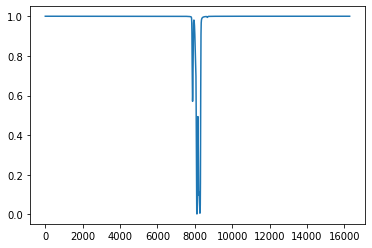

In [209]:
plt.plot(np.exp(-opticaldepth[('Hydrogen', 'H I')][ 'Optical depths']['Value']))

In [23]:
do_sight(0, {})

Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  525166219546725.4
Column from tau 525166219546724.7
Sum column:  1.862446300923946e+16
Column from tau 1.8624463009239428e+16
Sum column:  2500487811.6367593
Column from tau 2500487811.636756
Sum column:  597411.6439137106
Column from tau 597411.6439137104


In [97]:
snapshot.header['Readshift']

{'BoxSize': {'Value': array([67.77, 67.77, 67.77]),
  'Info': {'VarDescription': 'Extent of simulation volume',
   'CGSConversionFactor': 3.0856775814913676e+24,
   'aexp-scale-exponent': 1.0,
   'h-scale-exponent': -1.0}},
 'Cosmo': {'Redshift': 3.0165046357126,
  'HubbleParam': 0.6777,
  'OmegaMatter': 0.307,
  'OmegaBaryon': 0.0482519,
  'OmegaLambda': 0.693,
  'H0': 2.196276124456446e-18,
  'rhoc': 8.627080843259225e-30,
  'rhob': 4.162730421408598e-31},
 'NumPartTot': {'Value': 3376858818,
  'Info': {'VarDescription': 'Total number of gas particles in the simulation',
   'CGSConversionFactor': 1,
   'aexp-scale-exponent': 0,
   'h-scale-exponent': 0}},
 'MassTable': {'DarkMatterMass': {'Value': 0.0006570332889156362,
   'Info': {'VarDescription': 'Initial Dark Matter mass',
    'CGSConversionFactor': 1.989e+43,
    'aexp-scale-exponent': 0,
    'h-scale-exponent': -1}},
  'GasMass': {'Value': 0.00012252497526910687,
   'Info': {'VarDescription': 'Initial Gass particle mass',
    '

In [138]:
opticaldepth.keys()

dict_keys([('Hydrogen', 'H I'), ('Helium', 'HeII'), ('Carbon', 'C IV'), ('Silicon', 'SiIV')])

NameError: name 'opticaldepth' is not defined

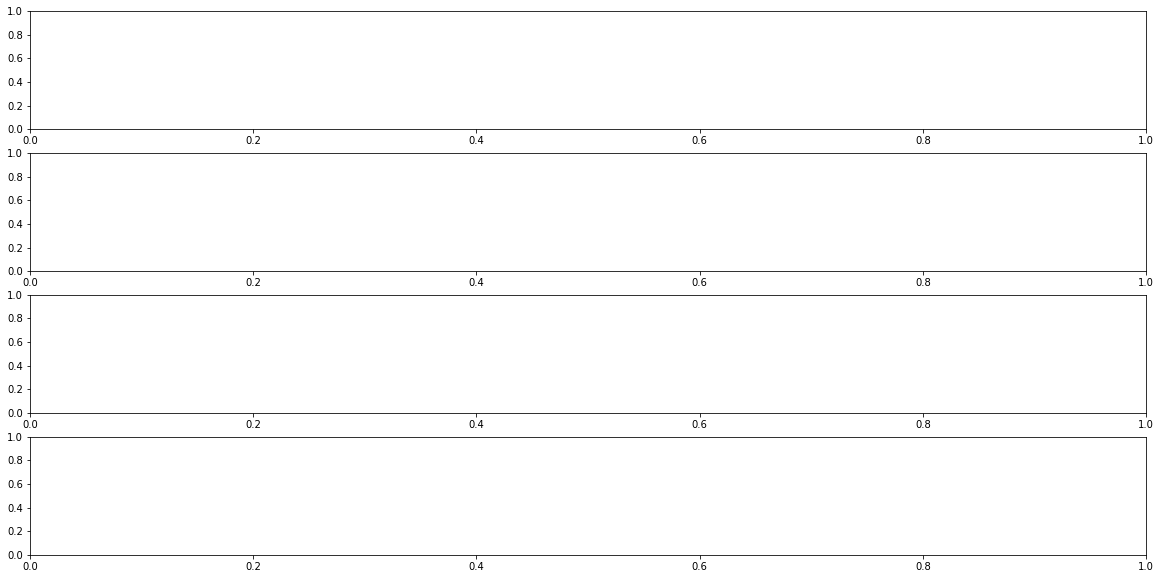

In [61]:
Numof_Ions = len(Ions)
fig, ax  = plt.subplots(Numof_Ions, 1, figsize = (20, 10))

for (i, ion) in zip (np.arange(Numof_Ions), Ions):
    #ax[i].set_xlim(0, box_kms)
    ax[i].plot(np.exp(-snapshot.ToCGS(opticaldepth[ion]['Optical depths'])),label = 'sightline# '+str(i))
    element, ion_name = ion
    title = r"{}".format(ion_name)
    ax[i].set_title(title)
    ax[i].set_ylabel(r"$\exp(-\tau)$")
    ax[i].set_xlabel(r"$v\ [{\rm km s}^{-1}]$")
    ax[i].legend()
    ax[i].axvline(x=7733,c='r')
    ax[i].axvline(x=8547,c='r')
    #ax[i].set_xlim(6200,6800)
fig.tight_layout()
fig.show()

In [67]:
(npix)

814

In [66]:
len(np.exp(-projections_extended[10]['OpticaldepthWeighted'][('Hydrogen','H I')]['Optical depths']['Value'])[7733:8547])

814

In [70]:
zerosss = np.zeros((21,814))

In [80]:
for i in range(21):
    zerosss[i] = projections_extended[i]['OpticaldepthWeighted'][('Hydrogen','H I')]['Optical depths']['Value'][7733:8547]

In [113]:
len(zerosss[0])

814

In [77]:
sighlines_pos[20]

(0.6339380645751953, 0.05518836498260498, 0.9194048309326173)

In [135]:
snapshot.header['Cosmo']['Redshift']

3.0165046357126

In [81]:
dx  = 0.003

array([[0.00158182, 0.00159374, 0.00160584, ..., 0.00198869, 0.00197613,
        0.0019637 ],
       [0.00175959, 0.00176795, 0.00177638, ..., 0.00231841, 0.00230595,
        0.00229359],
       [0.00133681, 0.00134401, 0.00135127, ..., 0.0013848 , 0.00137779,
        0.00137084],
       ...,
       [0.00038604, 0.00038784, 0.00038966, ..., 0.00066021, 0.00065569,
        0.00065125],
       [0.00032356, 0.000325  , 0.00032644, ..., 0.0007172 , 0.00071241,
        0.00070766],
       [0.00073336, 0.00073654, 0.00073975, ..., 0.00154594, 0.00153623,
        0.00152661]])

In [ ]:
tau_bins = {}
for galn in range(150):
    tau_bins['Gal_'+str(galn)] = {}
    x = halos[random_indx150[galn]][1]/100
    y = halos[random_indx150[galn]][2]/100
    z = halos[random_indx150[galn]][3]/100
    dz = 0.12
    dx = (1/ 0.33196009899287526)/400 / 100
    sighlines_pos =  [ (x-j*dx,y,z-dz*0.5) for j in np.arange(0,400)]


    ncpu   = 10      # number of cores to be used
    nsight = 400     # number of sight lines to compute
#    
    pool   = multiprocessing.Pool(ncpu)
    manager      = multiprocessing.Manager()
    projections_extended  = manager.dict()

    for i in range(nsight):
        pool.apply_async(do_sight, args=(i, projections_extended))
    pool.close()
    pool.join()
    
    for ion in Ions:

        tau_bins['Gal_'+str(galn)][ion] = {}
        zerosss = np.zeros((400,814))

        for i in range(nsight):
            zerosss[i] = projections_extended[i]['OpticaldepthWeighted'][ion]['Optical depths']['Value'][7733:8547]
        tau_bins['Gal_'+str(galn)][ion]['tau'] = zerosss
with open('filename_12p5.pickle', 'wb') as handle:
    pickle.dump(tau_bins, handle, protocol=pickle.HIGHEST_PROTOCOL)

Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1Warning! SightLength NOT found. Setting default value : 1

Warning! SightLength NOT found. Setting default value : 1

Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}

Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! ProjectionExtend NOT found. Setting defau

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  817240305261496.0
Column from tauSum column:   817240305261495.04.058468362991964e+18

Column from tau 4.0584683629919493e+18
Sum column:  205389109533616.7
Column from tau 205389109533616.47
Sum column:  160267275944492.6
Column from tau 160267275944492.5
Sum column:  549802660783010.2
Column from tau Sum column: 549802660783009.44 
12334160854873.238
Column from tau 12334160854873.229
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  3410454155463.467
Column from tau 3410454155463.473
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  3.1798579623562004e+18
Column from tau 3.1798579623561907e+18
Sum column:  478633752212755.06
Column from tau 478633752212754.3
Sum column:  8.438286456329914e+18
Column from tau 8.438286456329903e+18


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  721625002661633.0
Column from tau 721625002661632.0
Sum column:  999202081077873.9
Column from tau 999202081077874.0
Sum column:  9.572281239015555e+17
Column from tau 9.572281239015525e+17
Sum column:  23807087623174.402
Column from tau 23807087623174.44
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  707398864331743.9
Column from tau 707398864331745.0
Sum column:  16003157658687.355
Column from tau 16003157658687.365
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using period

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  6.450219307654276e+18
Column from tau 6.450219307654265e+18
Sum column:  813247927888429.4
Column from tau 813247927888427.5
Sum column:  1020144943609179.8
Column from tau 1020144943609179.8
Sum column:  185090262859035.03
Column from tau 185090262859035.0
Sum column:  4.732259976515737e+18
Column from tau 4.732259976515728e+18
Sum column:  13972127757381.191
Column from tau 13972127757381.193
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  21364253918104.14
Column from tau 21364253918104.13
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warn

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  3.145683466659333e+17
Column from tau 3.1456834666593376e+17
Sum column:  491587872859771.4
Column from tau 491587872859771.25
Sum column:  554064920339890.2
Column from tau 554064920339890.44
Sum column:  347300762824225.0
Column from tau 347300762824223.0
Sum column:  5.974083769487878e+16
Column from tau 5.974083769487873e+16
Sum column:  21138796858577.285
Column from tau 21138796858577.27
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  17003272464724.652
Column from tau 17003272464724.652
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
War

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  4654457585743.171
Column from tau 4654457585743.173
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  179500396953441.9
Column from tau 179500396953441.2
Sum column:  158797821829514.06
Column from tau 158797821829513.66
Sum column:  1113175255111.4292
Column from tau 1113175255111.4304
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1011648659153.6732
Column from tau 1011648659153.6724
Warning! SightLength NOT found. Setting default

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  1.888448886025623e+17
Column from tau 1.8884488860256195e+17


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  1.707208498142398e+17
Column from tau 1.7072084981423978e+17
Sum column:  1.841776776811808e+17
Column from tau 1.8417767768118045e+17
Sum column:  38276429003403.66
Column from tau 38276429003403.625
Sum column:  32700281650256.17
Column from tau 32700281650256.125
Sum column:  95060940002676.94
Column from tau 95060940002676.98
Sum column:  132503517042846.88
Column from tau 132503517042846.78
Sum column:  323692395078.1804
Column from tau 323692395078.18036
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  338022895303.3549
Column from tau 338022895303.3545
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfa

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  485340142863449.2
Column from tau 485340142863447.5
Sum column:  527217033380542.6
Column from tau 527217033380541.6
Sum column:  652332227338.4974
Column from tau 652332227338.4972
Sum column:  180561627441.69528
Column from tau 180561627441.69516
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  9719096035009.34
Column from tau 9719096035009.34
Sum column:  44372963532.67686
Column from tau 443729

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  6.883875697795679e+17
Column from tauSum column:   6.883875697795674e+172.8131472670255312e+17

Column from tau 2.8131472670255283e+17
Sum column:  3022106897464.199
Column from tau 3022106897464.195
Sum column: Sum column:   4.4206460051860243e+171586752709587.1416

Column from tauColumn from tau  1586752709587.14094.4206460051860294e+17

Sum column:  891417455261.9017
Column from tau 891417455261.9009
Sum column:  4.35189604715204e+17
Column from tau Sum column: 4.3518960471520314e+17 
82140984537.51935
Column from tau 82140984537.51938
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  5.649258151919422e+17
Column from tau 5.649258151919419e+17
Sum column:  5.2734404480876966e+17
Column from tau 5.2734

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  2.101379372171315e+18
Column from tau 2.1013793721713126e+18
Sum column:  4.4536920713661805e+17
Column from tau 4.453692071366176e+17


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  2.1199230990109348e+18
Column from tau 2.1199230990109384e+18
Sum column: Sum column:   772575541663459.61.0575323293085267e+18

Column from tauColumn from tau  772575541663459.81.0575323293085254e+18

Sum column:  951578778781220.5
Column from tau 951578778781219.5
Sum column:  814341328697239.4
Column from tau 814341328697238.4
Sum column:  778753143535714.1
Column from tau 778753143535713.6
Sum column:  2100738188569293.5
Column from tau 2100738188569292.8
Sum column:  93616332196955.6
Column from tau 93616332196955.69
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  137959560335707.53
Column from tau 137959560335707.23
Sum column:  39796751129530.234
Column from tauWarning! SightLength NOT found. Se

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  8.486251413033318e+17
Column from tau 8.486251413033302e+17
Sum column:  1.5187548227525503e+19
Column from tau 1.5187548227525468e+19
Sum column:  4.667223503498226e+18
Column from tau 4.667223503498223e+18
Sum column:  1776429054216474.8
Column from tau 1776429054216469.5
Sum column:  8208347981783416.0
Column from tau 8208347981783416.0
Sum column:  994803765262073.8
Column from tau 994803765262072.2
Sum column:  7772525076903356.0
Column from tau 7772525076903359.0
Sum column:  1689197704188366.5
Column from tau 1689197704188363.5
Sum column:  654092738204898.9
Column from tau 654092738204898.4
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  Sum column: 4471261176266538.5 
48202998972748.66Column f

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  5.210111170780037e+18
Column from tau 5.210111170780032e+18
Sum column:  3.236849069280354e+18
Column from tau 3.236849069280354e+18
Sum column:  203483050698570.0
Column from tau 203483050698570.25
Sum column:  3.0309611603854177e+18
Column from tau 3.030961160385424e+18
Sum column:  733683732614934.8
Column from tau 733683732614934.5
Sum column:  378662566044159.5
Column from tauSum column:   378662566044159.56238237566278912.06

Column from tau 238237566278912.22
Sum column:  15010931794498.719
Column from tau 15010931794498.715
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  367655202215288.75
Column from tau 367655202215288.56
Sum column:  121979466701150.98
Column from tau 121979466701150.95
Warn

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  2.616937418420779e+18
Column from tau 2.616937418420778e+18
Sum column:  7.068303046081675e+18
Column from tau 7.068303046081666e+18
Sum column:  102209159582165.44
Column from tau 102209159582165.48
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1712494919592683.5
Column from tau 1712494919592684.5
Sum column:  703260424435553.9
Column from tau 703260424435553.4
Sum column:  1731734599364908.8
Column from tau 1731734599364908.2
Sum column:  40161369061184.95
Column from tau 40161369061184.875
Sum column:  228707736719617.84
Column from tau 228707736719617.72
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extend

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  392754009779142.7
Column from tau 392754009779142.4
Sum column:  27071039964378.207
Column from tau 27071039964378.184
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  8.838019331857332e+18
Column from tau 8.838019331857334e+18
Sum column:  2.9009365725880243e+18
Column from tau 2.900936572588017e+18


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  1.0974062438172625e+19
Column from tau 1.0974062438172627e+19
Sum column:  731918562952164.9
Column from tau 731918562952165.0
Sum column:  4.1584502012240174e+18
Column from tau 4.1584502012240215e+18
Sum column:  733459312309066.9
Column from tau 733459312309067.2Sum column: 
 601409765115391.0
Column from tau 601409765115390.2
Sum column:  183145984462193.16
Column from tau 183145984462193.28
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  4.517288144742031e+18
Column from tau 4.51728814474204e+18
Sum column:  1148434451664423.8
Column from tau 1148434451664421.5
Sum column:  167975490106591.1
Column from tau 167975490106591.22
Sum column:  70859705020241.52
Column from tau 70859705020241.4
Warning!

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1.897688778959365e+18
Column from tau 1.8976887789593626e+18
Sum column:  316906013850900.7
Column from tau 316906013850900.4
Sum column:  235548313233122.2
Column from tau 235548313233122.16
Sum column:  262496094188494.6
Column from tau 262496094188493.97
Sum column:  2.0873623234712182e+18
Column from tau 2.087362323471217e+18
Sum column:  1676840666279.534
Column from tau 1676840666279.5332
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and us

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  106772329035730.06
Column from tau 106772329035729.88
Sum column:  7338168109926.639
Column from tau 7338168109926.639
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0Sum column: 
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions 
399186158679252.06
Column from tau 399186158679252.25
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  44128292878332.02
Column from tau 44128292878332.0
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default valu

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  3.008680685748366e+17
Column from tau 3.0086806857483686e+17
Sum column:  2.4530504766582787e+17
Column from tau 2.4530504766582787e+17
Sum column:  2.051591540468506e+17
Column from tau 2.0515915404685066e+17
Sum column:  3217181765661.26
Column from tau 3217181765661.255
Sum column:  552930750661.9423
Column from tau 552930750661.9418
Sum column:  255729179737.6563
Column from tau 255729179737.6563
Sum column:  2570081708617.329
Column from tau 2570081708617.322Sum column: 
 12186932364.839302
Column from tau 12186932364.839306
Sum column:  1399031224450.0615
Column from tau 1399031224450.0603
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  2265203183.6604586
Column from tau 2265203183.6604595
Warnin

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  1.1822651311995783e+19
Column from tau 1.1822651311995763e+19
Sum column:  8.293325767686705e+18
Column from tauSum column:   8.293325767686707e+183711131054264481.5

Column from tau 

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


3711131054264480.5
Sum column:  1.1911287891761043e+19
Column from tau 1.1911287891761033e+19


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  449455533376115.9
Column from tau 449455533376115.9
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1615557779014970.8
Column from tau 1615557779014966.2
Sum column:  1.1017913514383573e+19
Column from tau 1.1017913514383553e+19


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  3515601327022482.0
Column from tau 3515601327022481.0
Sum column:  2257701886033366.0
Column from tau 2257701886033362.5
Sum column:  553229025616865.25
Column from tau 553229025616864.0
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1206770028509102.2
Column from tau 1206770028509103.0
Sum column:  695857647693832.5
Column from tau 695857647693833.1
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1004706405396818.2
Column from ta

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  5.287345134568385e+18
Column from tau 5.287345134568386e+18


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  4.911261342665827e+18
Column from tau 4.911261342665828e+18


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  558112150137268.1
Column from tau 558112150137267.9
Sum column:  427088994413847.8
Column from tau 427088994413847.94
Sum column:  203214468962968.4
Column from tau 203214468962967.6
Sum column:  5.83730820287682e+18
Column from tau 5.837308202876828e+18
Sum column:  99883996731417.52
Column from tau 99883996731417.45
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  66089758000273.86
Column from tau 66089758000273.92
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic 

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  505222957.6007208
Column from tau 505222957.60072017
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1404977517836.5217
Column from tau 1404977517836.522
Sum column:  3320546908556616.0
Column from tau 3320546908556617.0
Sum column:  1168967416821.2886
Column from tau 1168967416821.2888
Sum column:  313598210.41970986
Column from tau 313598210.4197096
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  3119804169807128.0
Column from ta

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column: Sum column:   106586709872.05513083626985625546.0

Column from tauColumn from tau  106586709872.05523083626985625537.5

Sum column:  121841903934.65584
Column from tau 121841903934.65598
Sum column:  125185541978.2743
Column from tau Sum column: 125185541978.27429 
68098245104.94696
Column from tau 68098245104.947014
Sum column:  58342874.056332804
Column from tau 58342874.05633274
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  56719621122.24463
Column from tau 56719621122.24467
Sum column:  60104018.4355162Sum column: 
 Column from tauSum column: Sum column: 65872682662.6063   
3157346487912538.060104018.43551618656086624.31788393
Column from tau
Column from tau
  Column from tauSum column: 6587268266

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  160237936879.2372
Column from tau 160237936879.23737
Sum column:  23510212.529582188
Column from tau 23510212.529582188
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  181463953432.56506
Column from tau 181463953432.5648
Sum column:  18244615.891884748
Column from tau 18244615.89188473
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  21314640.796948735
Column from tau 21314640.796948746
Warning! SightLength NOT found. Setting defaul

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  4.446041379483018e+17
Column from tau 4.446041379482987e+17
Sum column:  33411974427545.266
Column from tau 33411974427545.258
Sum column:  2.8165597697652854e+18
Column from tau Warning! SightLength NOT found. Setting default value : 1
2.8165597697652823e+18
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  658899751638171.9
Column from tau 658899751638171.1
Sum column:  58429025965327.01
Column from tau 58429025965327.01
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1503121233607486.2
C

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  61796979037202.055
Column from tau 61796979037202.04
Sum column:  631159829182202.8
Column from tau 631159829182202.1
Sum column:  1087241848552061.5
Column from tau 1087241848552060.9
Sum column:  Sum column: 33404938966988.332 
1478243519535335.5Column from tau
 Column from tau33404938966988.348 
1478243519535332.2
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  1246778450958.571
Column from tau 1246778450958.5715
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic 

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  1.1106319000250377e+18
Column from tau 1.1106319000250367e+18
Sum column:  36676134149840.984
Column from tau 36676134149840.99
Sum column:  8.965297656752879e+17
Column from tau 8.965297656752879e+17
Sum column:  23366678694812.938
Column from tau 23366678694812.887
Sum column:  24327373104427.195
Column from tau 24327373104427.168
Sum column:  186731706110.73785
Column from tauSum column:   186731706110.7379863068047129144.74

Column from tau 63068047129144.695
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Sum column: Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions 
44302381944793.91
Column from tau 44302381944793.87
Sum column:  269127404290.50305
Column from tau 269127404290.50284
Warning! SightLength NOT found. Setting default value : 1
Warning! Projectio

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  238198438255355.53
Column from tau 238198438255355.16
Sum column:  1623282254120.233
Column from tau 1623282254120.232
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  2.3852703760542756e+16
Column from tau Sum column: 2.3852703760542736e+16 
2.8638118693221668e+16
Column from tau 2.8638118693221652e+16
Sum column:  8187939054494.704
Column from tau 8187939054494.702
Sum column:  5.757941592547124e+16
Sum column: Column from tauSum column:    5718097842518.9345.757941592547116e+165.234380645118573e+16


Column from tauColumn from tau  5.234380645118566e+165718097842518.919

Sum column:  34319381415.542202
Column from tau 34319381415.542183
Sum column:  13617257553289.484
Column from tau 13617257553289.4

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  6.480511456502945e+17
Column from tau 6.480511456502929e+17
Sum column:  5.7583009174485e+17
Column from tau 5.758300917448502e+17
Sum column:  77747759.74889158
Column from tau 77747759.74889143
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  354904631084.14325
Column from tau 354904631084.14276
Sum column:  183853098247.75143
Column from tau 183853098247.75122
Sum column:  5401434054169.114
Column from tau 5401434054169.098
Sum column:  2285918334.1762023
Column from tau 2285918334.1762023
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warni

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5



Sum column:  23633244874640.95
Column from tau 23633244874640.918
Sum column:  30943767387725.453
Column from tau 30943767387725.52
Sum column:  5.397917752367994e+17
Column from tau 5.3979177523679744e+17
Sum column:  3.486703273617994e+17
Column from tau 3.486703273617991e+17


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  813985168168.9298
Column from tau Sum column: 813985168168.9297 
1076574877810.3273
Column from tau 1076574877810.3273
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  40171897071895.82
Column from tau 40171897071895.79
Sum column:  5919425253085732.0
Column from tau 5919425253085725.0
Sum column:  13016499096537.37
Column from tau 13016499096537.371
Sum column:  1437492917476.8145
Column from tau 

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  250390229450.09387
Column from tau 250390229450.09384
Sum column: Sum column:  157313615.55702147 
852467970494280.6Column from tau
Column from tau  157313615.55702135852467970494275.6

Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  820196846826606.6
Column from tau 820196846826602.2
Sum column:  5.2178502176900664e+16
Column from tau 5.217850217690066e+16
Sum column:  4.9743177689979304e+16
Column from tau 4.974317768997916e+16


/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  3.996532790386698e+16
Column from tau 3.996532790386692e+16
Sum column:  308946979119.4395
Column from tau 308946979119.43945
Sum column:  794476111900146.8
Column from tau 794476111900140.8
Sum column:  335173014497.03345
Column from tau 335173014497.0336
Sum column:  4.754403455582498e+16
Column from tau 4.754403455582496e+16
Sum column:  4.5074743312933944e+16
Column from tau 4.507474331293392e+16
Sum column:  233646665762.83466
Column from tau 233646665762.83472
Sum column:  186823138.27280825
Column from tau 186823138.27280784
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  330100109272.55853
Column from tau 330100109272.55865
Sum column:  306455751753.3877
Column from tau 306455751753.3876
Sum co

/cosma7/data/dp004/dc-aram1/pyspecwizard_main/gitcontrol/oficial_git/specwizard/specwizard/SpecWizard_ComputeOpticaldepth.py:197: RuntimeWarning: invalid value encountered in sqrt
  bions_kms = np.sqrt(2*self.constants["kB"]*Tions/weight) / 1e5


Sum column:  79294074781.65097
Column from tau 79294074781.651
Sum column:  90881691156.00853
Column from tau 90881691156.00845
Sum column:  3.505443287076182e+16
Column from tau 3.505443287076178e+16
Sum column:  5015947.7360000005
Column from tau 5015947.736000002
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  5104854.15100732
Column from tau 5104854.151007319
Warning! SightLength NOT found. Setting default value : 1
Warning! ProjectionExtend NOT found. Setting default value : {'extend': False, 'extendfactor': 3}
Warning! nsight NOT found. Setting default value : 0
Warning! You are calculating a los shorter than the box-size 
 and using periodic boundary conditions
Sum column:  3.5892120895363936e+16
Column from

In [88]:
import pickle

In [86]:
import sys 
sys.getsizeof(tau_bins)

NameError: name 'tau_bins' is not defined

In [ ]:
(240/5)* 160 / 1e6

In [88]:
tau_bins['Gal_0']

{('Hydrogen',
  'H I'): {'tau': array([[2.60298115e+00, 2.81441452e+00, 3.03958537e+00, ...,
          3.80069502e-03, 3.78917266e-03, 3.77770358e-03],
         [4.92081284e+00, 4.82760463e+00, 4.72993700e+00, ...,
          1.55216682e-03, 1.54730997e-03, 1.54247714e-03],
         [4.37620105e-01, 4.43329356e-01, 4.49579518e-01, ...,
          4.93148005e-03, 4.91679875e-03, 4.90218366e-03],
         ...,
         [4.84916892e-01, 4.86237875e-01, 4.86149010e-01, ...,
          5.10530346e-04, 5.08657771e-04, 5.06795693e-04],
         [6.28717650e-01, 6.31534644e-01, 6.34353401e-01, ...,
          2.40816652e-02, 2.40075125e-02, 2.39337023e-02],
         [6.87331524e-01, 6.87026723e-01, 6.84937777e-01, ...,
          1.59564157e-04, 1.59071604e-04, 1.58581347e-04]])},
 ('Helium',
  'HeII'): {'tau': array([[1.06170686e+00, 1.18828807e+00, 1.34515326e+00, ...,
          4.37942308e-11, 4.08329850e-11, 3.80651767e-11],
         [6.62566346e+01, 6.27308770e+01, 5.92866522e+01, ...,
       

In [119]:
np.shape(tau_bins['Gal_0']['Hydrogen','H I']['tau'])

(21, 814)